In [9]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
img_rows, img_cols = 28, 28
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
inpx = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2, 2))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [15]:
model = Model(inputs=inpx, outputs=layer7)

In [16]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.0958 - loss: 2.4552
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.0987 - loss: 2.4369
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 340ms/step - accuracy: 0.0988 - loss: 2.4158
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.1000 - loss: 2.4010
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 80s 347ms/step - accuracy: 0.0982 - loss: 2.3893
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 349ms/step - accuracy: 0.0965 - loss: 2.3751
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 343ms/step - accuracy: 0.0994 - loss: 2.3603
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.1017 - loss: 2.3460
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - accuracy: 0.1036 - loss: 2.3314
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 337ms/step - accuracy: 0.1114 - loss: 2.3155
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 370ms/step - accuracy: 0.1161 - loss: 2.3017
Epoch 12/12
120/120

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss =', score[0])
print('Accuracy =', score[1])

Loss = 2.280574083328247
Accuracy = 0.13740000128746033


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted Label: 8
Actual Label: 4


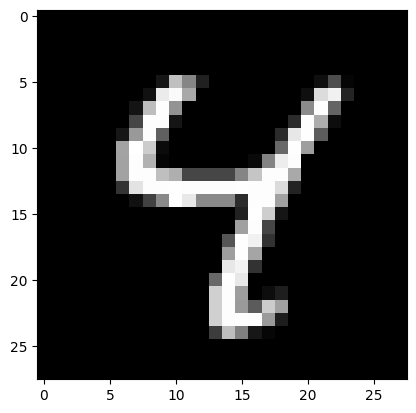

In [19]:
y_predicted_by_model = model.predict(x_test)
print("Predicted Label:", np.argmax(y_predicted_by_model[6]))
print("Actual Label:", np.argmax(y_test[6]))
plt.imshow(x_test[6].reshape(28, 28), cmap='gray')
plt.show()